In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

from src.utils import inference, visualize_predictions
from src.data import RNADataset
from src.checkpoint import load_checkpoint
from src.pipeline import predict_structure
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
model, optimizer, epoch = load_checkpoint('checkpoints/checkpoint.pt')
print(f"Epoch: {epoch}")

Loaded checkpoint from checkpoints/checkpoint.pt
Epoch: 6


In [3]:
test_dataset = RNADataset.load("data/test_dataset.pkl")
test_loader = DataLoader(
    test_dataset,
    batch_size=512,
    shuffle=False,
)

In [4]:
len(test_dataset)

2047

.......(..(((.........................).......).........
...........((.........................).......).........


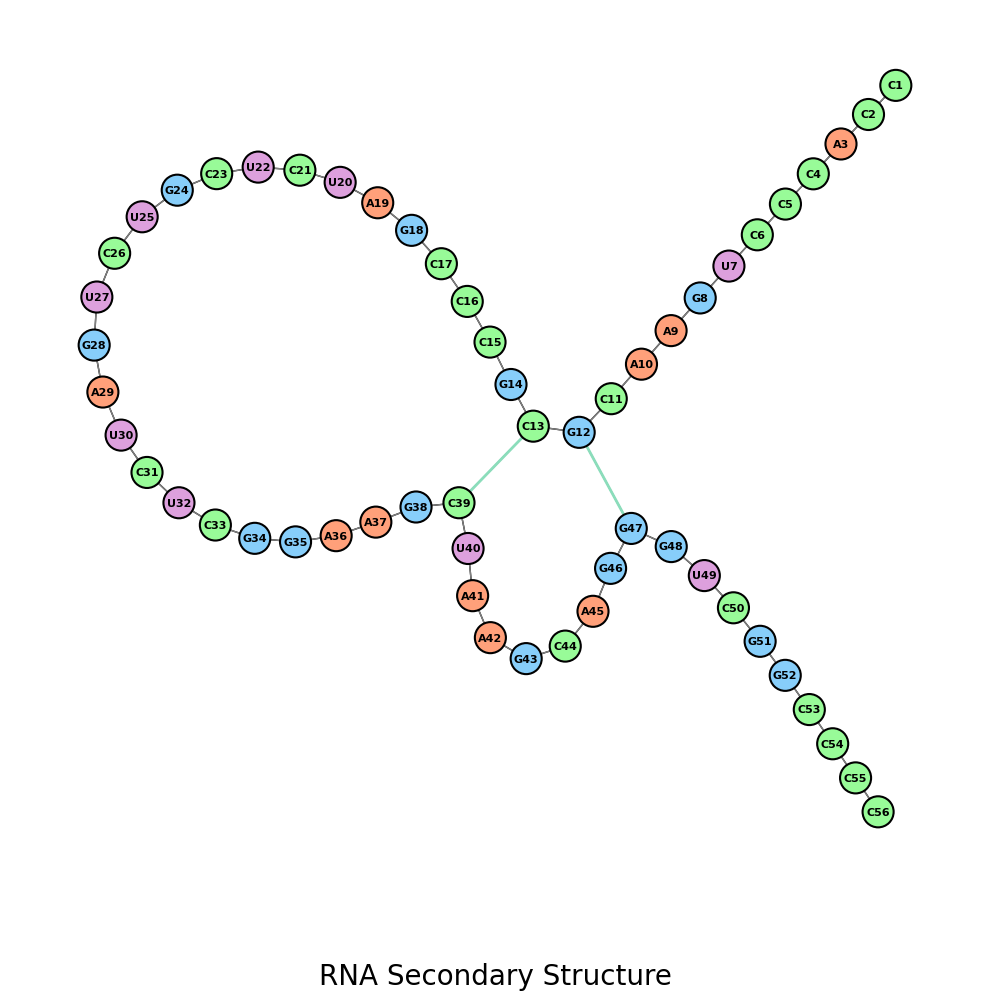

In [20]:
seq = "CCACCCUGAACGCGCCCGAUCUCGUCUGAUCUCGGAAGCUAAGCAGGGUCGGCCCC"
struct = predict_structure(seq, model, test_dataset.encode_sequence, test_dataset.idx_to_struct);

In [6]:
print(f"{'5S human':16}: " + seq)
print(f"{'MY AI':16}: " + struct)
print(f"{'RNA Central':16}: " + "(((((((((....((((((((.....((((((............))))..))....)))))).)).(((((......((.((.(((....))))).)).....))))).)))))))))...")
print(f"{'IPKnot':16}: " + "(((((((((....[[[[[[[[...[[((((((..((....))..))))..]]....]]]]]].]]))[[[[[..[[.[[[[[..((....))((]]]]].]]]]]]])))))))))))...")


5S human        : GUCUACGGCCAUACCACCCUGAACGCGCCCGAUCUCGUCUGAUCUCGGAAGCUAAGCAGGGUCGGGCCUGGUUAGUACUUGGAUGGGAGACCGCCUGGGAAUACCGGGUGCUGUAGGCUUU
MY AI           : ..((.(((((.(.((.(((((..((((((((..............)))..)))..)).)))))))))..((...(..(((((.((((.(.)))))))))..).))))))))).........
RNA Central     : (((((((((....((((((((.....((((((............))))..))....)))))).)).(((((......((.((.(((....))))).)).....))))).)))))))))...
IPKnot          : (((((((((....[[[[[[[[...[[((((((..((....))..))))..]]....]]]]]].]]))[[[[[..[[.[[[[[..((....))((]]]]].]]]]]]])))))))))))...
